# Monte Carlo method

This notebook is based on Lectures 9-11 of the Computational Finance course https://www.youtube.com/playlist?list=PL6zzGYGhbWrPaI-op1UfNl0uDglxdkaOB

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Monte Carlo integration of a deterministic function


Let us calculate the integral of an exponential function $\int_0^1 e^x dx$ using two methods:

(1) *Naive method*:  
    - create a rectangular domain spanning $[a,b]=[0,1]$ on the $x$-axis and $[c,d]=[1,3]$ on the $y$-axis  
    - draw $N$ random numbers along both the axes  
    - calculate the number of points $p$ satisfying $e^{x_i}>y_i$  
    - the estimated integral is then $p/N$

(2) *Expectation approach*:  
    - note that $\int_0^1 e^x dx = \left<e^x\right>_{\mathcal{U}[0,1]}$ where $<\cdot>$ denotes expectation calculation per $\mathcal{U}[0,1]$, the uniform distribution between 0 and 1  
    - to estimate the integral, we draw $N$ uniform random numbers between 0 and 1  
    - for each random number $x_i$, calculate $e^{x_i}$  
    - the estimated integral is the mean $\sum_{i=1}^N e^{x_i}/N$


Integral estimate using naive approach with 1000 samples is 1.734
Integral estimate using expectation approach with 1000 samples is 1.7079435311728903


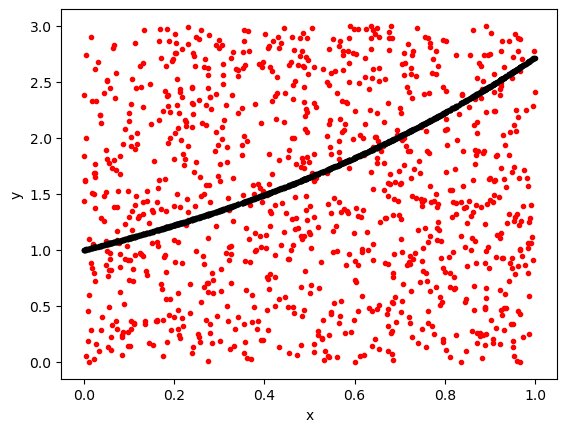

In [26]:
# --- Method 1: naive approach ---
def naive(function, a, b, c, d, nSamples):    
    x = np.random.uniform(a,b,nSamples)
    y = np.random.uniform(c,d,nSamples)
    
    p = function(x) > y
    p = np.mean(p)
    
    integral = p * (b-a) * (d-c) 
    
    plt.figure()
    plt.plot(x,y,'.r')
    plt.plot(x,function(x),'.k')
    plt.xlabel('x')
    plt.ylabel('y')
    return integral

f = lambda x: np.exp(x)
a = 0
b = 1
c = 0
d = 3
nSamples = 1000
estimate_naive = naive(f, a, b, c, d, nSamples)
print("Integral estimate using naive approach with", nSamples, "samples is", estimate_naive)

# --- Method 2: expectation approach ---
def expectation(function, a, b, nSamples): 
    x = np.random.uniform(a, b, nSamples)  
    integral = (b-a) * np.mean(function(x))
    return integral

estimate_exp = expectation(f, a, b, nSamples)
print("Integral estimate using expectation approach with", nSamples, "samples is", estimate_exp)

## Monte Carlo integration of a deterministic function over a Wiener process

Consider the integral $\int_0^1 g(t)dW(t)$ where $g(t)=t^2$. The integral has vanishing mean. The variance is thus
$$\mathrm{Var}\left[\int_0^1 t^2dW(t)\right] = \mathrm{E}\left[\left(\int_0^1 t^2dW(t)\right)^2\right] = \mathrm{E}\left[\int_0^1 t^4dt\right] = 0.2$$
The penultimate step follows from Ito isometry. We will now calculate the variance of the integral using Monte Carlo integration and compare it with the analytical value.

Mean is -3.907985046680551e-18 and variance is 0.2074711996030368
Theoretical variance: 0.2


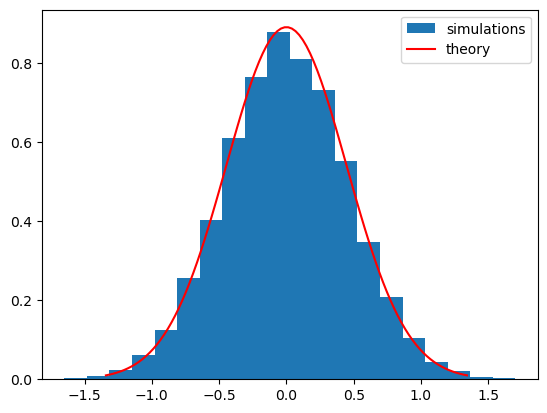

In [8]:
def integrate(function, a, b, nSamples, nSteps):
    rand = np.random.normal(0, 1, ((nSamples, nSteps)))
    w = np.zeros((nSamples, nSteps+1))
    integral = np.zeros((nSamples, nSteps+1))
    t = np.zeros(nSteps+1)
    t[0] = a
    dt = (b-a) / nSteps
    for i in range(nSteps):
        rand = (rand - np.mean(rand[:,i])) / np.std(rand[:,1])
        w[:,i+1] = w[:,i] + np.sqrt(dt) * rand[:,i]
        integral[:,i+1] = integral[:,i] + function(t[i]) * np.sqrt(dt) * rand[:,i]
        t[i+1] = t[i] + dt
    print("Mean is", np.mean(integral[:,-1]), "and variance is", np.var(integral[:,-1]))
    return integral

integral = integrate(lambda x: x**2, 0, 1, 5000, 1000)
plt.hist(integral[:,-1],bins=20,density=1,label='simulations')

# theory
mu = 0
variance = 0.2
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),'r',label='theory')
print("Theoretical variance:",0.2)

plt.legend()